## Solve Conflict using non conflicting nodes as goal nodes

This example answers on how to correct existing road element when the road is in conflict with building footprints and has no reference data available.


In [1]:
import os
import sys
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from kaizen_mapping.utils.gis import read_data_frame
from kaizen_mapping.map.trace import traces_from_data_frame
from kaizen_mapping.map.grid import PixelGrid
from kaizen_mapping.utils.gis import convert_and_get_extent
from kaizen_mapping.map.navigator import AStar
from shapely.geometry import LineString


### Read trace Data Frame

In [2]:
trace_data_frame = read_data_frame(r"D:\Cypherics\Library\kaizen\data\demo2.shp")

### Read Obstacle Data Frame

In [3]:
obstacle_data_frame = read_data_frame("D:\Cypherics\Library\kaizen\data\demo2_bfp.shp")

### Visualize the data frames

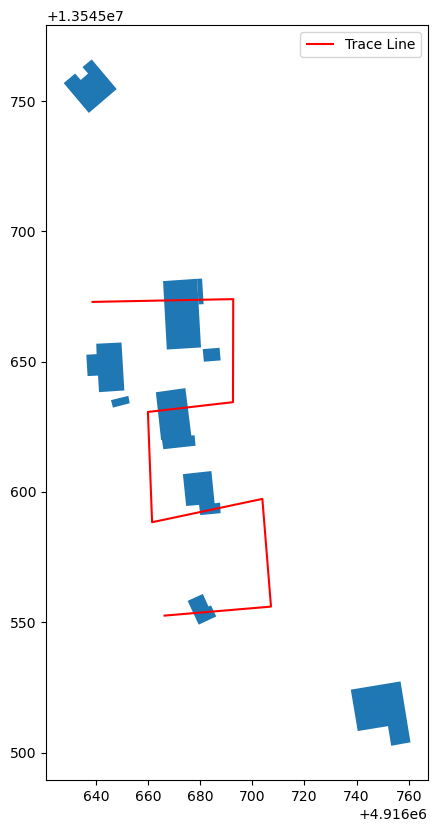

In [4]:
f, ax = plt.subplots(1)
obstacle_data_frame.plot(ax=ax, label='Building Footprint')
trace_data_frame.plot(ax=ax,cmap=None, color="red", label='Trace Line')
plt.legend()
plt.show()

### Initialize the grid for the area on which the conflict is to be resolved
the bounding box of the area can be extracted from [this](https://boundingbox.klokantech.com/) website and export it in json format

The bounding box can be of a city, or a smaller region, what ever the extent, it should occupy all the traces and obstacle to run

In [5]:
grid = PixelGrid.pixel_grid(
    resolution=1,
    grid_bounds=convert_and_get_extent(
        [
            [
                [2.13242075, 42.84341088],
                [2.23118924, 42.84341088],
                [2.23118924, 42.90975515],
                [2.13242075, 42.90975515],
                [2.13242075, 42.84341088],
            ]
        ],
        crs_to="epsg:26910",
    ),
)

### Add obstacle to the grid so the navigator is aware of which part of the grid is to avoid

In [6]:
grid.add_obstacle(obstacle_data_frame, extend_boundary_pixel=2)

### Generate Traces from dataframe

In [7]:
traces = traces_from_data_frame(trace_data_frame)

### Initialize the navigator to find path

In [8]:
navigator = AStar()

>>Navigator Progress: Found GOAL (3213, 7997), GOAL COUNT - 6/6COUNT - 6/7

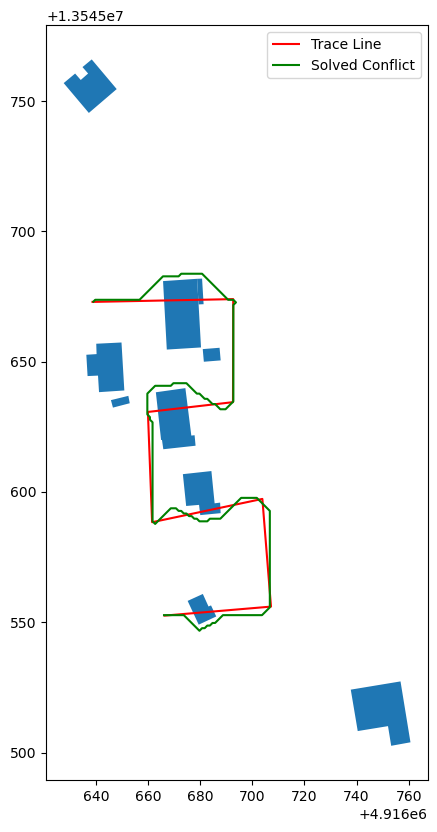

In [9]:
solved_path_list = list()

# A GENERATOR WHICH WILL KEEP ON YEILDING FOR EVERY TRACE PRESENT IN TRACES
for solved_path in navigator.path_finder_from_traces(grid, traces, search_space_threshold=5, epsilon=1):
    solved_path_list.append(LineString(solved_path))
    
    
solved_path_data_frame = gpd.GeoDataFrame(solved_path_list,
    columns=['LineString'], 
    geometry='LineString')

f, ax = plt.subplots(1)
obstacle_data_frame.plot(ax=ax, label='Building Footprint')
trace_data_frame.plot(ax=ax,cmap=None, color="red", label='Trace Line')

solved_path_data_frame.plot(ax=ax, cmap=None, color="green", label='Solved Conflict')

plt.legend()
plt.show()